In [1]:
#importing necessery libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)# using pandas setting options to display maximum rows
pd.set_option("display.max_rows",None)
pd.set_option("display.width",500)
pd.set_option("display.expand_frame_repr",False)


In [2]:
movies = pd.read_csv(r"C:\Users\ASUS\Desktop\documents canada\moviesmetadata.csv")
ratings = pd.read_csv(r"C:\Users\ASUS\Desktop\documents canada\ratings.csv")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20748\1641987460.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv(r"C:\Users\ASUS\Desktop\documents canada\moviesmetadata.csv")


In [3]:
# Check column names
print(movies.columns)

# Display DataFrame
print(movies)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'], dtype='object')


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
# Step 1: Inspect the Data
print("Movies DataFrame Head:")
print(movies.head())

print("\nRatings DataFrame Head:")
print(ratings.head())


Movies DataFrame Head:
   adult                              belongs_to_collection    budget                                             genres                              homepage     id    imdb_id original_language               original_title                                           overview popularity                       poster_path                               production_companies                               production_countries release_date      revenue  runtime                                   spoken_languages    status                                            tagline                        title  video  vote_average  vote_count
0  FALSE  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  http://toystory.disney.com/toy-story    862  tt0114709                en                    Toy Story  Led by Woody, Andy's toys live happily in his ...  21.946943  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg     [{'name': 'Pixar Anima

In [5]:
# Display information about the movies DataFrame
print("Movies DataFrame Info:")
print(movies.info())

# Display information about the ratings DataFrame
print("\nRatings DataFrame Info:")
print(ratings.info())

Movies DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 no

In [6]:
# Step 2: Handle Missing Values
print("\nMovies DataFrame Missing Values:")
print(movies.isnull().sum())

print("\nRatings DataFrame Missing Values:")
print(ratings.isnull().sum())


Movies DataFrame Missing Values:
adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

Ratings DataFrame Missing Values:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [7]:
# Drop columns with more than 100 missing values
threshold = 100
columns_to_drop = movies.columns[movies.isnull().sum() > threshold]
movies_cleaned = movies.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
print("Movies DataFrame after dropping columns with more than 100 missing values:")
print(movies_cleaned.head())

Movies DataFrame after dropping columns with more than 100 missing values:
   adult    budget                                             genres     id    imdb_id original_language               original_title popularity                               production_companies                               production_countries release_date      revenue                                   spoken_languages    status                        title  video  vote_average  vote_count
0  FALSE  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...    862  tt0114709                en                    Toy Story  21.946943     [{'name': 'Pixar Animation Studios', 'id': 3}]  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30  373554033.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released                    Toy Story  False           7.7      5415.0
1  FALSE  65000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   8844  tt0113497                en                      Juma

In [8]:
# Check for missing values in the cleaned DataFrame
print("Missing values in movies_cleaned DataFrame:")
print(movies_cleaned.isnull().sum())

Missing values in movies_cleaned DataFrame:
adult                    0
budget                   0
genres                   0
id                       0
imdb_id                 17
original_language       11
original_title           0
popularity               5
production_companies     3
production_countries     3
release_date            87
revenue                  6
spoken_languages         6
status                  87
title                    6
video                    6
vote_average             6
vote_count               6
dtype: int64


In [9]:
# Drop rows with any missing values
movies_cleaned = movies_cleaned.dropna(axis=0)

# Display the cleaned DataFrame
print("Movies DataFrame after dropping rows with missing values:")
print(movies_cleaned.head())

Movies DataFrame after dropping rows with missing values:
   adult    budget                                             genres     id    imdb_id original_language               original_title popularity                               production_companies                               production_countries release_date      revenue                                   spoken_languages    status                        title  video  vote_average  vote_count
0  FALSE  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...    862  tt0114709                en                    Toy Story  21.946943     [{'name': 'Pixar Animation Studios', 'id': 3}]  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30  373554033.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released                    Toy Story  False           7.7      5415.0
1  FALSE  65000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   8844  tt0113497                en                      Jumanji  17.015539  [

In [10]:
# Check for missing values in the cleaned DataFrame
print("Missing values in movies_cleaned DataFrame after dropping rows:")
print(movies_cleaned.isnull().sum())

Missing values in movies_cleaned DataFrame after dropping rows:
adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64


In [11]:

from scipy import stats

# Define a function to identify outliers using Z-score method
def find_outliers_z_score(data):
    z_scores = np.abs(stats.zscore(data))
    threshold = 3
    outliers = np.where(z_scores > threshold)
    return outliers

# Find outliers in ratings DataFrame
ratings_outliers = find_outliers_z_score(ratings['rating'])
print("Outliers in Ratings DataFrame:")
print(ratings.iloc[ratings_outliers])

# Find outliers in movies_cleaned DataFrame for numeric columns
numeric_columns = movies_cleaned.select_dtypes(include=np.number).columns
for column in numeric_columns:
    outliers = find_outliers_z_score(movies_cleaned[column])
    print(f"\nOutliers in {column} column of Movies DataFrame:")
    print(movies_cleaned.iloc[outliers])


Outliers in Ratings DataFrame:
Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []

Outliers in revenue column of Movies DataFrame:
       adult     budget                                             genres      id    imdb_id original_language                                     original_title  popularity                               production_companies                               production_countries release_date       revenue                                   spoken_languages    status                                              title  video  vote_average  vote_count
0      FALSE   30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...     862  tt0114709                en                                          Toy Story   21.946943     [{'name': 'Pixar Animation Studios', 'id': 3}]  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30  3.735540e+08           [{'iso_639_1': 'en', 'name': 'English'}]  Released                                   

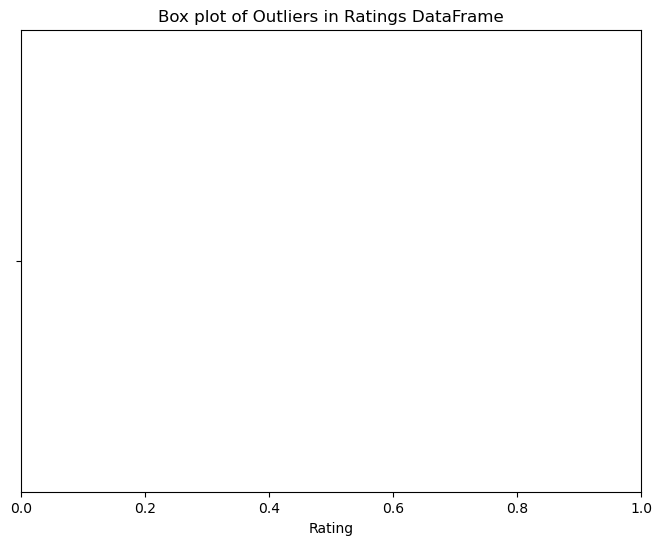

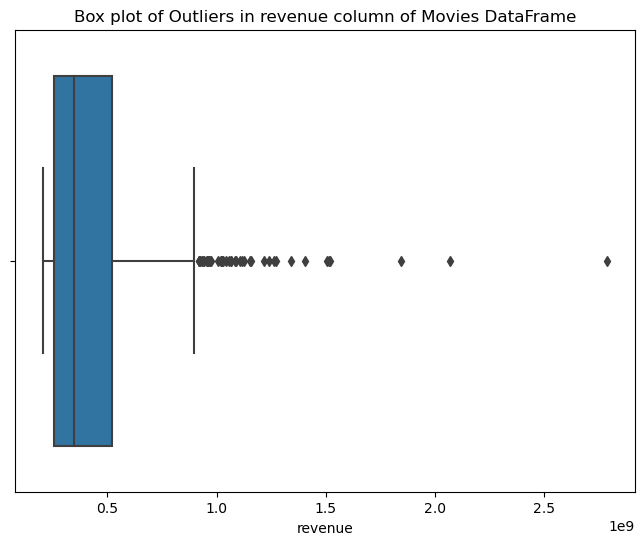

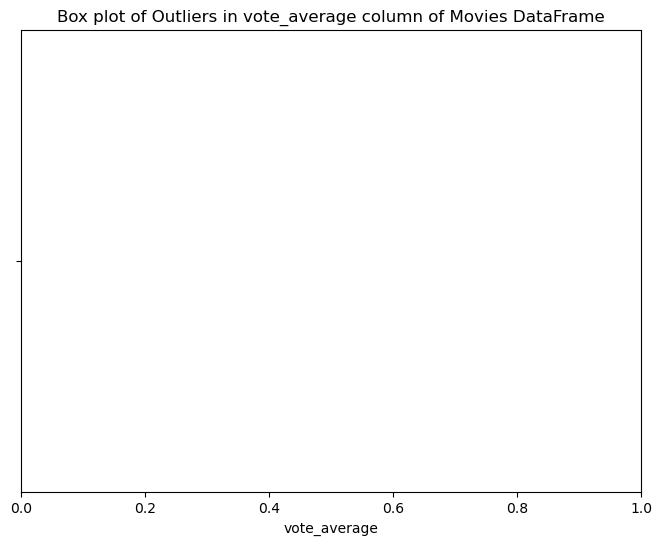

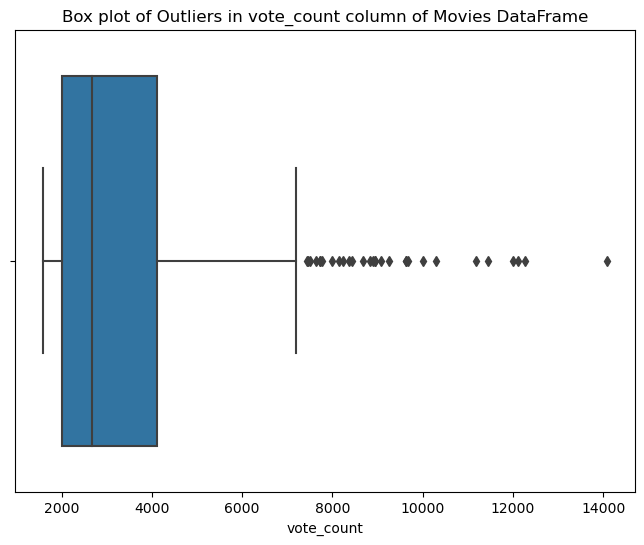

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for outliers in ratings DataFrame
plt.figure(figsize=(8, 6))
sns.boxplot(x=ratings.iloc[ratings_outliers[0]]['rating'])
plt.title('Box plot of Outliers in Ratings DataFrame')
plt.xlabel('Rating')
plt.show()

# Create box plots for outliers in numeric columns of movies_cleaned DataFrame
for column in numeric_columns:
    outliers_data = movies_cleaned.iloc[find_outliers_z_score(movies_cleaned[column])[0]][column]
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=outliers_data)
    plt.title(f'Box plot of Outliers in {column} column of Movies DataFrame')
    plt.xlabel(column)
    plt.show()


# it is clear that the ratings file do not have any outlier as well as outliers in another file are not that important as those columns do not provide much help in context of our analysis.

In [13]:
# Find duplicates in the movies_cleaned DataFrame
duplicates = movies_cleaned[movies_cleaned.duplicated()]

if not duplicates.empty:
    print("Duplicates found in movies_cleaned DataFrame:")
    print(duplicates)
else:
    print("No duplicates found in movies_cleaned DataFrame.")


Duplicates found in movies_cleaned DataFrame:
       adult  budget                                             genres      id    imdb_id original_language    original_title popularity                               production_companies                               production_countries release_date   revenue                                   spoken_languages    status                           title  video  vote_average  vote_count
1465   FALSE       0  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...  105045  tt0111613                de   Das Versprechen   0.122178  [{'name': 'Studio Babelsberg', 'id': 264}, {'n...          [{'iso_3166_1': 'DE', 'name': 'Germany'}]   1995-02-16       0.0           [{'iso_639_1': 'de', 'name': 'Deutsch'}]  Released                     The Promise  False           5.0         1.0
9165   FALSE       0  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...    5511  tt0062229                fr       Le Samouraï   9.091288  [{'name': 'Fida cinematografica', 'id

In [14]:
# Remove duplicates from the movies_cleaned DataFrame
movies_cleaned = movies_cleaned.drop_duplicates()

# Check if duplicates are removed
print("Duplicates removed from movies_cleaned DataFrame.")


Duplicates removed from movies_cleaned DataFrame.


In [15]:
import string
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_recommenders as tfrs
from collections import Counter
from typing import Dict, Text
from ast import literal_eval
from datetime import datetime
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

In [16]:
credits = pd.read_csv(r"C:\Users\ASUS\Desktop\documents canada\credits.csv")
keywords = pd.read_csv(r"C:\Users\ASUS\Desktop\documents canada\keywords.csv")
movies = pd.read_csv(r"C:\Users\ASUS\Desktop\documents canada\moviesmetadata.csv").\
                     drop(['belongs_to_collection', 'homepage', 'imdb_id', 'poster_path', 'status', 'title', 'video'], axis=1).\
                     drop([19730, 29503, 35587]) # Incorrect data type

movies['id'] = movies['id'].astype('int64')

df = movies.merge(keywords, on='id').\
    merge(credits, on='id')

df['original_language'] = df['original_language'].fillna('')
df['runtime'] = df['runtime'].fillna(0)
df['tagline'] = df['tagline'].fillna('')

df.dropna(inplace=True)

In [17]:
def get_text(text, obj='name'):
    text = literal_eval(text)
    
    if len(text) == 1:
        for i in text:
            return i[obj]
    else:
        s = []
        for i in text:
            s.append(i[obj])
        return ', '.join(s)
    
df['genres'] = df['genres'].apply(get_text)
df['production_companies'] = df['production_companies'].apply(get_text)
df['production_countries'] = df['production_countries'].apply(get_text)
df['crew'] = df['crew'].apply(get_text)
df['spoken_languages'] = df['spoken_languages'].apply(get_text)
df['keywords'] = df['keywords'].apply(get_text)

# New columns
df['characters'] = df['cast'].apply(get_text, obj='character')
df['actors'] = df['cast'].apply(get_text)

df.drop('cast', axis=1, inplace=True)
df = df[~df['original_title'].duplicated()]
df = df.reset_index(drop=True)

In [18]:
# Cleaned dataset
df.head()

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,crew,characters,actors
0,FALSE,30000000,"Animation, Comedy, Family",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,,7.7,5415.0,"jealousy, toy, boy, friendship, friends, rival...","John Lasseter, Joss Whedon, Andrew Stanton, Jo...","Woody (voice), Buzz Lightyear (voice), Mr. Pot...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,FALSE,65000000,"Adventure, Fantasy, Family",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995-12-15,262797249.0,104.0,"English, Français",Roll the dice and unleash the excitement!,6.9,2413.0,"board game, disappearance, based on children's...","Larry J. Franco, Jonathan Hensleigh, James Hor...","Alan Parrish, Samuel Alan Parrish / Van Pelt, ...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."
2,FALSE,0,"Romance, Comedy",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"Warner Bros., Lancaster Gate",United States of America,1995-12-22,0.0,101.0,English,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"fishing, best friend, duringcreditsstinger, ol...","Howard Deutch, Mark Steven Johnson, Mark Steve...","Max Goldman, John Gustafson, Ariel Gustafson, ...","Walter Matthau, Jack Lemmon, Ann-Margret, Soph..."
3,FALSE,16000000,"Comedy, Drama, Romance",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,81452156.0,127.0,English,Friends are the people who let you be yourself...,6.1,34.0,"based on novel, interracial relationship, sing...","Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...","Savannah 'Vannah' Jackson, Bernadine 'Bernie' ...","Whitney Houston, Angela Bassett, Loretta Devin..."
4,FALSE,0,Comedy,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,1995-02-10,76578911.0,106.0,English,Just When His World Is Back To Normal... He's ...,5.7,173.0,"baby, midlife crisis, confidence, aging, daugh...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","George Banks, Nina Banks, Franck Eggelhoffer, ...","Steve Martin, Diane Keaton, Martin Short, Kimb..."


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42371 entries, 0 to 42370
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 42371 non-null  object 
 1   budget                42371 non-null  object 
 2   genres                42371 non-null  object 
 3   id                    42371 non-null  int64  
 4   original_language     42371 non-null  object 
 5   original_title        42371 non-null  object 
 6   overview              42371 non-null  object 
 7   popularity            42371 non-null  object 
 8   production_companies  42371 non-null  object 
 9   production_countries  42371 non-null  object 
 10  release_date          42371 non-null  object 
 11  revenue               42371 non-null  float64
 12  runtime               42371 non-null  float64
 13  spoken_languages      42371 non-null  object 
 14  tagline               42371 non-null  object 
 15  vote_average       

In [20]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['budget'] = df['budget'].astype('float64')
df['popularity'] = df['popularity'].astype('float64')

In [21]:
# EDA(exploratory data analysis)

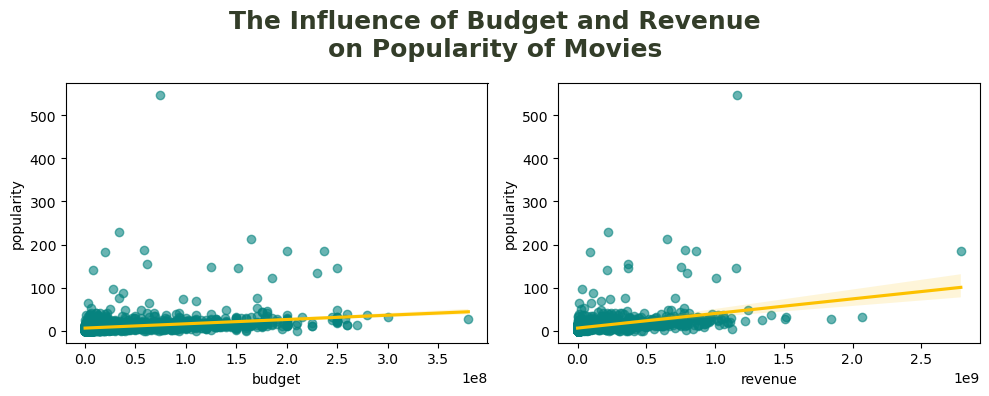

In [22]:
# Filtering out rows where budget and revenue are both not equal to zero
df_plot = df[(df['budget'] != 0) & (df['revenue'] != 0)]

# Creating a figure with two subplots side by side, each subplot will have its own axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Adding a title to the entire figure
plt.suptitle('The Influence of Budget and Revenue\non Popularity of Movies', fontsize=18, weight=600, color='#333d29')

# Iterating over the columns 'budget' and 'revenue' for plotting
for i, col in enumerate(['budget', 'revenue']):
    # Using Seaborn's regplot to create a scatter plot with a regression line for each column
    sns.regplot(data=df_plot, x=col, y='popularity',
                # Setting scatter plot properties such as color and transparency
                scatter_kws={"color": "#06837f", "alpha": 0.6},
                # Setting regression line properties such as color
                line_kws={"color": "#fdc100"}, ax=axes[i])

# Adjusting layout to prevent subplot overlaps
plt.tight_layout()



Insights:
Budget and Revenue just slighly influence the popularity of the movies


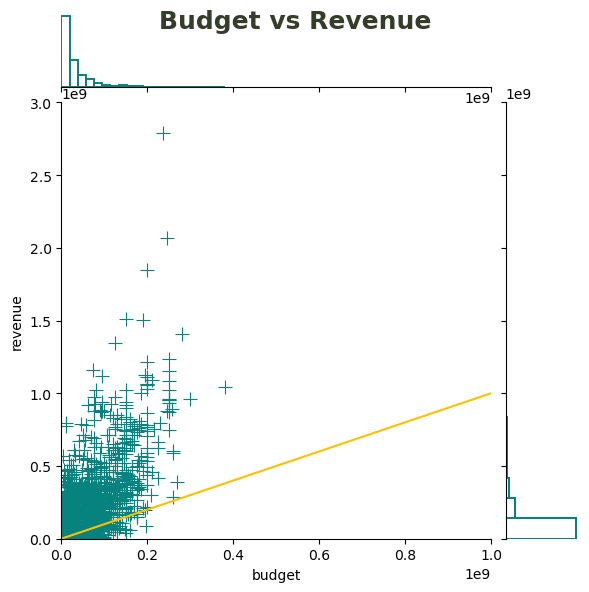

In [23]:
# Creating a joint plot using Seaborn, which shows the relationship between 'budget' and 'revenue'
ax = sns.jointplot(
    # Filtering out rows where both 'budget' and 'revenue' are not equal to zero
    data=df[(df['budget'] != 0) & (df['revenue'] != 0)],
    x='budget',  # Data for x-axis
    y='revenue',  # Data for y-axis
    marker="+",  # Marker style
    s=100,  # Marker size
    # Setting properties for marginal histograms, such as number of bins and fill
    marginal_kws=dict(bins=20, fill=False),
    color='#06837f'  # Color of the plot
)

# Adding a title to the entire figure
ax.fig.suptitle('Budget vs Revenue', fontsize=18, weight=600, color='#333d29')

# Setting the limits for the x-axis from 0 to 1 billion
ax.ax_joint.set_xlim(0, 1e9)

# Setting the limits for the y-axis from 0 to 3 billion
ax.ax_joint.set_ylim(0, 3e9)

# Adding a diagonal line to represent a 1:1 relationship between budget and revenue
ax.ax_joint.axline((1,1), slope=1, color='#fdc100')


insights
Most of the movies lay on top of the yellow line, indicate that those movies
make a profit


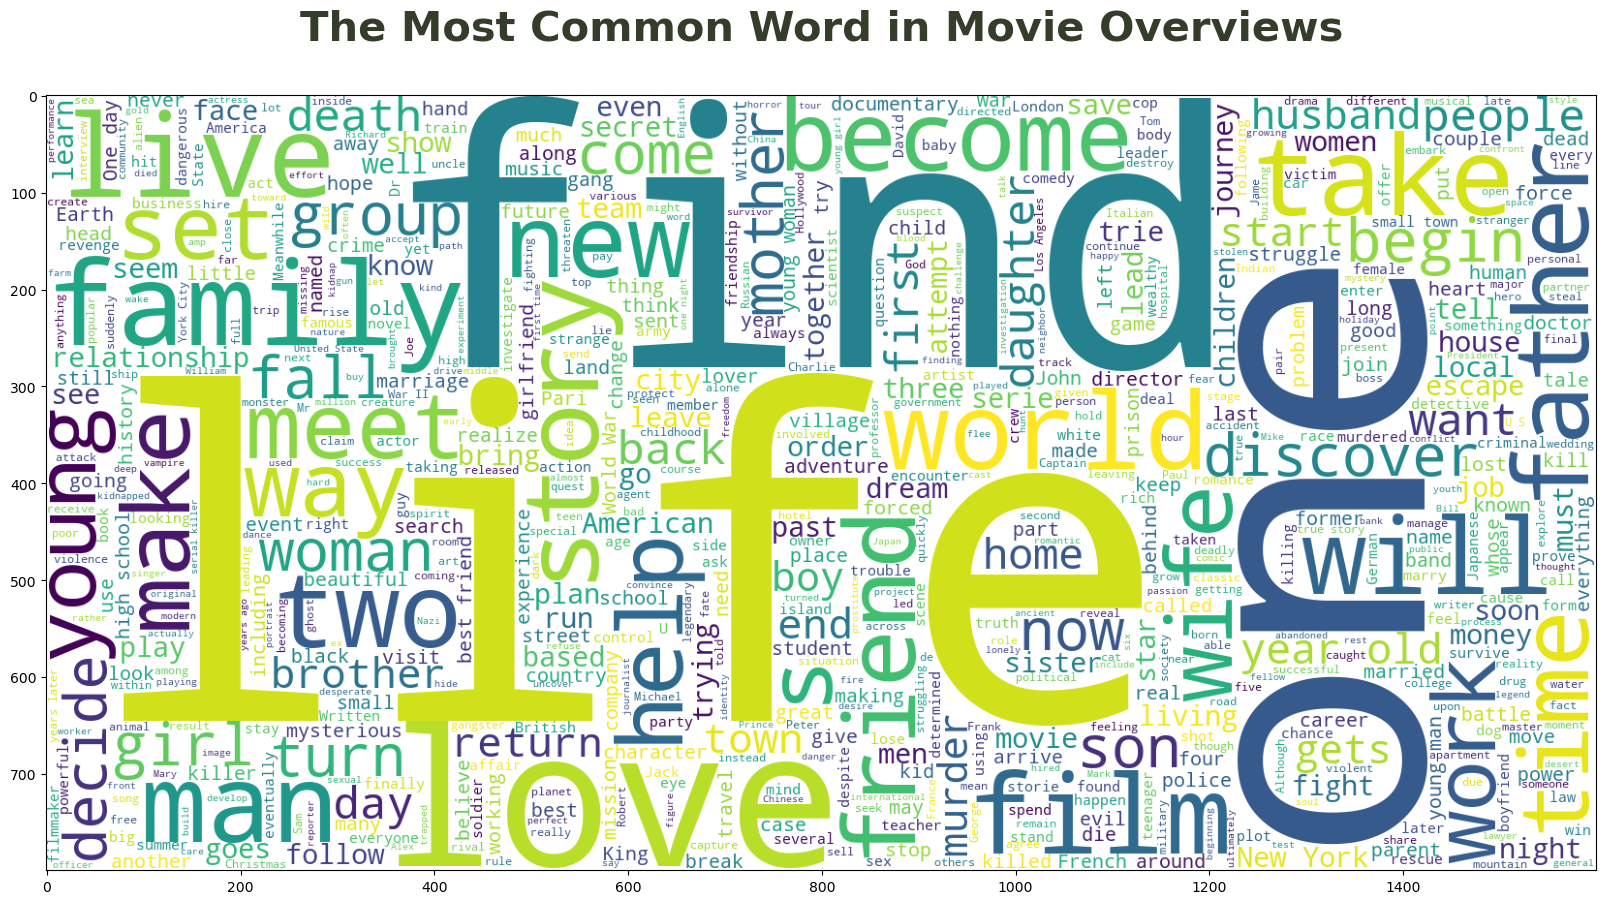

In [24]:
# Creating a new figure with a specific size
plt.figure(figsize=(20,20))

# Adding a title to the plot
plt.title('The Most Common Word in Movie Overviews\n', fontsize=30, weight=600, color='#333d29')

# Generating a WordCloud object using the 'overview' column of the DataFrame
wc = WordCloud(
    max_words=1000,        # Maximum number of words to display
    min_font_size=10,      # Minimum font size for the words
    height=800,            # Height of the WordCloud
    width=1600,            # Width of the WordCloud
    background_color="white"  # Background color of the WordCloud
).generate(' '.join(df['overview']))  # Generating the WordCloud using the text in 'overview' column

# Displaying the WordCloud using plt.imshow() function
plt.imshow(wc)


Insights
Word "life", "one", "find", "love" apparently appear in many occasions

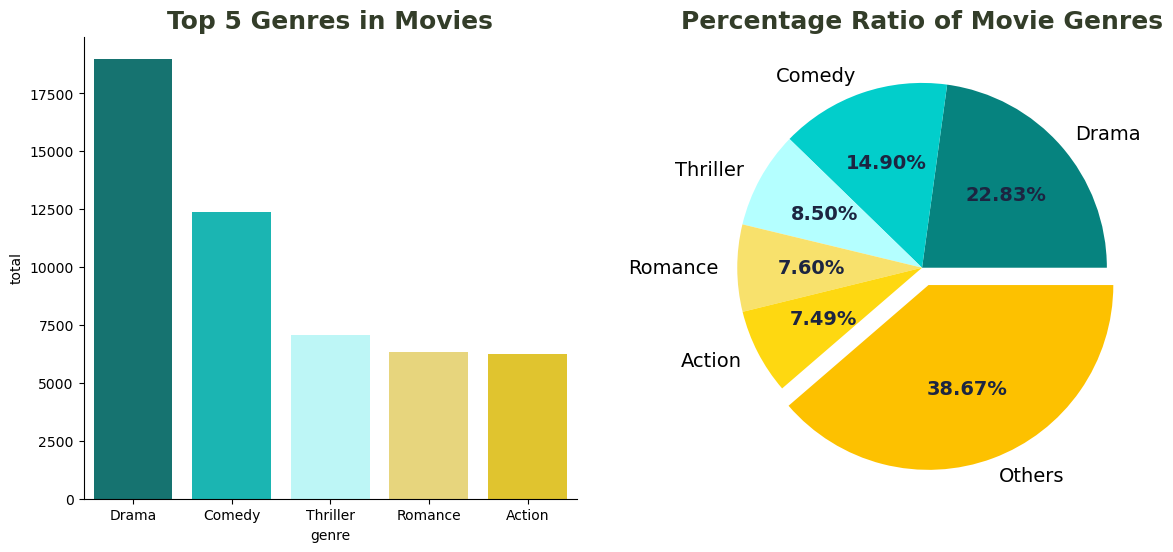

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Extracting individual genres from the 'genres' column and creating a list
genres_list = []
for i in df['genres']:
    genres_list.extend(i.split(', '))

# Creating subplots with 1 row and 2 columns, setting the figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

# Creating a DataFrame to plot the top 5 genres
df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])

# Creating the bar plot for the top 5 genres
ax = sns.barplot(data=df_plot, x='genre', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax.set_title('Top 5 Genres in Movies', fontsize=18, weight=600, color='#333d29')

# Removing the top and right spines from the plot
sns.despine()

# Creating a DataFrame to plot the percentage ratio of movie genres
df_plot_full = pd.DataFrame([Counter(genres_list)]).transpose().sort_values(by=0, ascending=False)
df_plot.loc[len(df_plot)] = {'genre': 'Others', 'total':df_plot_full[6:].sum()[0]}

# Creating the pie chart for the percentage ratio of movie genres
plt.title('Percentage Ratio of Movie Genres', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot['total'], labels=df_plot['genre'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0,0,0,0,0,0.1], colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])

# Setting color and weight for autopct text
for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

# Turning off the axis for the pie chart
axes[1].axis('off')

# Displaying the plot
plt.show()


conclusion
Drama is the most dominant genre with over 18000 movies
Out of 5 top genres, there are still many genres in the dataset. They hold 38.67% of total genres in the movies


Text(0.5, 1.0, 'Total Released Movie by Date')

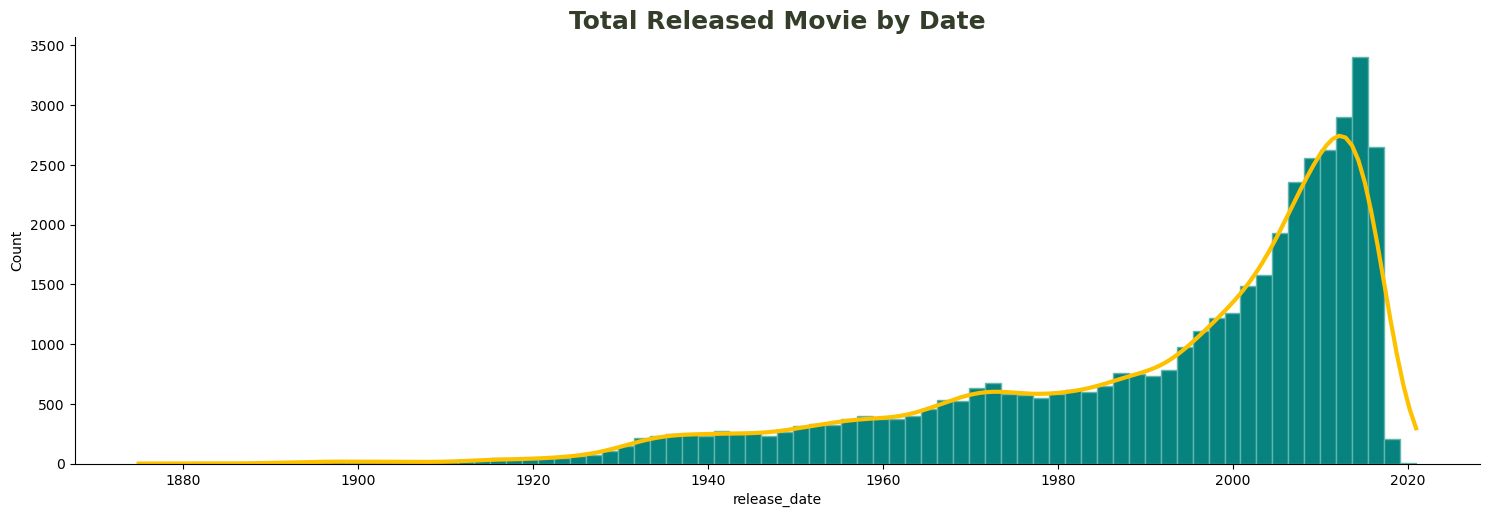

In [26]:
# Creating a distribution plot using Seaborn, which displays the distribution of movie release dates
sns.displot(
    data=df,                      # DataFrame containing the data
    x='release_date',            # Data to be plotted on the x-axis
    kind='hist',                 # Type of plot: histogram
    kde=True,                    # Whether to plot a kernel density estimate along with the histogram
    color='#fdc100',             # Color of the histogram bars
    facecolor='#06837f',         # Face color of the histogram bars
    edgecolor='#64b6ac',         # Edge color of the histogram bars
    line_kws={'lw': 3},          # Line properties for the kernel density estimate
    aspect=3                     # Aspect ratio of the plot
)

# Adding a title to the plot
plt.title('Total Released Movie by Date', fontsize=18, weight=600, color='#333d29')


conclusion: Started from 1930, movies industry had grown significantly
from 50 years ago
A drop in total released movies around 2020 is
because the dataset only contains a few data in those years

In [27]:
# Creating an empty list to store individual languages
original_language_list = []

# Looping through each entry in the 'original_language' column of the DataFrame
for i in df['original_language']:
    # Splitting the string by comma and adding the individual languages to the list
    original_language_list.extend(i.split(', '))

# Creating an empty list to store individual spoken languages
spoken_languages_list = []

# Looping through each entry in the 'spoken_languages' column of the DataFrame
for i in df['spoken_languages']:
    # Checking if the entry is not an empty string
    if i != '':
        # Splitting the string by comma and adding the individual languages to the list
        spoken_languages_list.extend(i.split(', '))

# Creating an empty list to store individual actors
actors_list = []

# Looping through each entry in the 'actors' column of the DataFrame
for i in df['actors']:
    # Checking if the entry is not an empty string
    if i != '':
        # Splitting the string by comma and adding the individual actors to the list
        actors_list.extend(i.split(', '))

# Creating an empty list to store individual crew members
crew_list = []

# Looping through each entry in the 'crew' column of the DataFrame
for i in df['crew']:
    # Checking if the entry is not an empty string
    if i != '':
        # Splitting the string by comma and adding the individual crew members to the list
        crew_list.extend(i.split(', '))

# Creating an empty list to store individual production companies
company_list = []

# Looping through each entry in the 'production_companies' column of the DataFrame
for i in df['production_companies']:
    # Checking if the entry is not an empty string
    if i != '':
        # Splitting the string by comma and adding the individual production companies to the list
        company_list.extend(i.split(', '))

# Creating an empty list to store individual production countries
country_list = []

# Looping through each entry in the 'production_countries' column of the DataFrame
for i in df['production_countries']:
    # Checking if the entry is not an empty string
    if i != '':
        # Splitting the string by comma and adding the individual production countries to the list
        country_list.extend(i.split(', '))

